In [1]:
import seaborn as sns
import pandas as pd
pd.set_option('mode.chained_assignment',None)

In [2]:
df = pd.read_csv('../spims-dump.csv')
df.head(10)

,tok_idx,layer_idx,I,S,T,F,C,func,source,target
0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
1,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
2,2,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
3,3,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
4,4,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
5,5,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
6,6,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
7,0,1,0.310381,0.000707,0.211581,0.343611,0.133721,spim,Reprise de la session,Resumption of the session
8,1,1,0.356254,-0.008910,0.167717,0.389704,0.095236,spim,Reprise de la session,Resumption of the session
9,2,1,0.280524,-0.004883,0.067926,0.591911,0.064522,spim,Reprise de la session,Resumption of the session


In [3]:
sub_dfs = []
for term in 'ISTFC':
    sub_df = df[['layer_idx', term, 'func']]
    sub_df['term'] = term
    sub_df['metric'] = sub_df[term]
    del sub_df[term]
    sub_dfs.append(sub_df)
melt = pd.concat(sub_dfs)
melt.sample(10)

,layer_idx,func,term,metric
493677,5,l2,I,16.868802
872038,5,norm_ratio,S,3.982766
467198,0,norm_ratio,T,inf
181744,3,spim,T,0.358695
438825,6,l2,C,69.817195
100200,3,cosine,S,0.059561
1873,1,norm_ratio,F,1.316414
53429,1,spim,S,-0.011660
130921,0,cosine,C,NaN
1305612,1,norm_ratio,F,1.459671


<AxesSubplot:xlabel='layer_idx', ylabel='metric'>

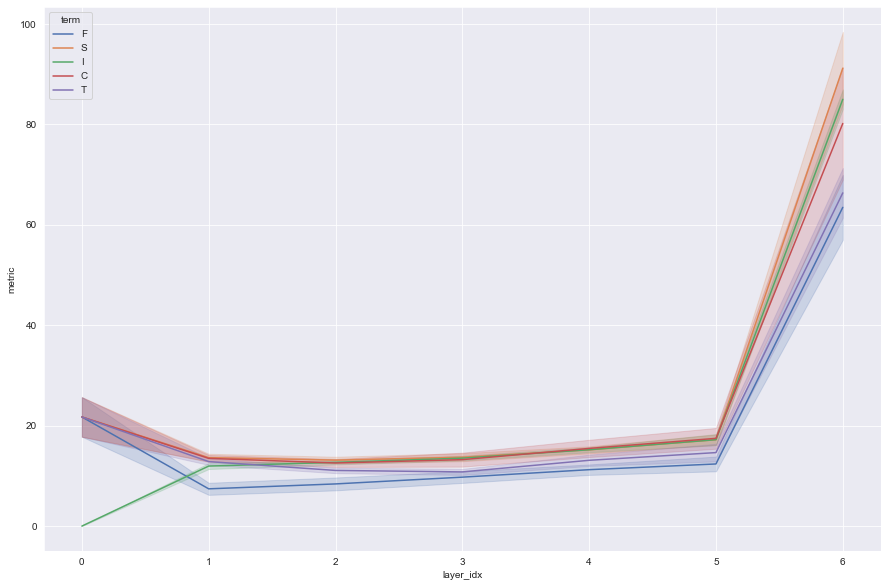

In [7]:
sns.set_theme({'figure.figsize':(15,10)})
sns.lineplot(x='layer_idx', y='metric', hue='term', data=melt[melt.func == 'l2'].sample(frac=1.0).reset_index(), ci='sd')

<AxesSubplot:xlabel='layer_idx', ylabel='metric'>

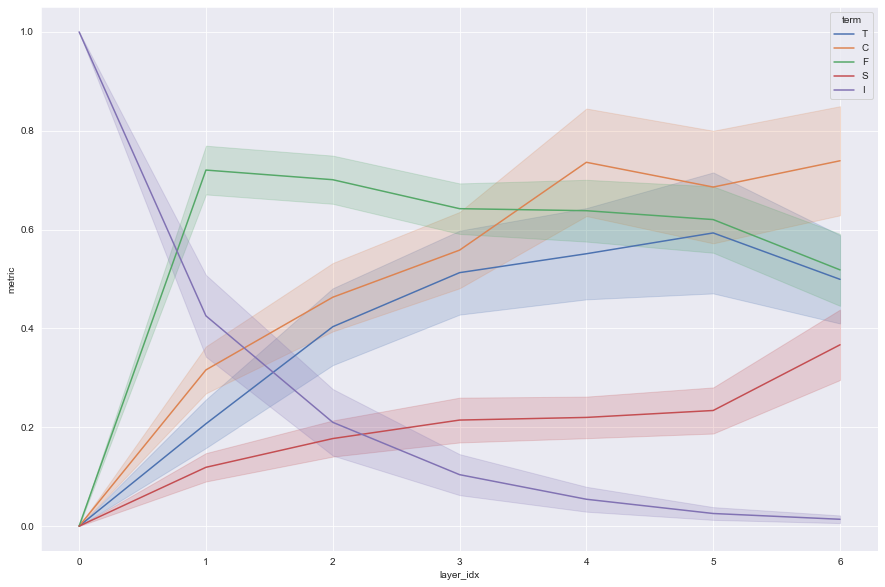

In [5]:
sns.set_theme({'figure.figsize':(15,10)})
nr_melt = melt[melt.func == 'norm_ratio']
nr_melt.metric = 1 / nr_melt.metric
sns.lineplot(x='layer_idx', y='metric', hue='term', data=nr_melt.sample(frac=1.0).reset_index(), ci='sd')

<AxesSubplot:xlabel='layer_idx', ylabel='metric'>

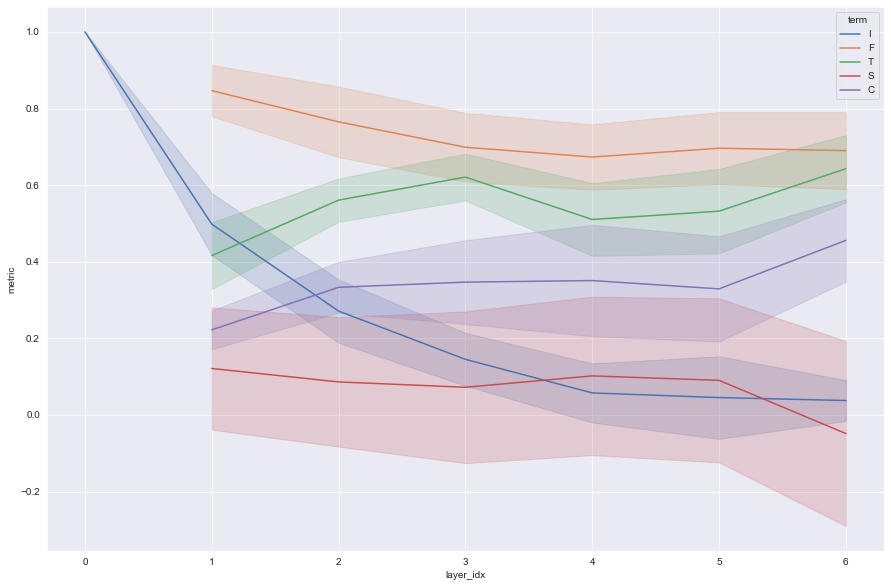

In [6]:
sns.set_theme({'figure.figsize':(15,10)})
sns.lineplot(x='layer_idx', y='metric', hue='term', data=melt[melt.func == 'cosine'].sample(frac=1.0).reset_index(), ci='sd')